# Tema 3: Datasets, Dataloaders y collate functions

In [1]:
from torchvision import transforms, datasets
from torchvision.transforms import Lambda
from torch.utils.data import DataLoader
import torch

import matplotlib.pyplot as plt
import torch.nn.functional as F

import pandas as pd
import numpy as np
import torch


from torch.utils.data import Dataset, DataLoader
import time
import random

## 1. Crear un Dataloader para el dataset Fashion MNIST

### Crear un Transform para el conjunto de entrenamiento que:
*   Cambie el tamaño de las muestras a 80x80
*   Data augmentation:
  * Volteo horizontal (probabilidad de 0.5)
  * Volteo vertical (probabilidad de 0.5)
  * Recorte aleatorio de secciones de 75x75
  * Rotación aleatoria de 10 grados
*   Pasar a tensor
*   Normalizar

### Crear un Transform para el conjunto de test que:

*   Cambie el tamaño de las muestras a 80x80
*   Pasar a tensor
*   Normalizar




In [2]:
transform_train = transforms.Compose([
    transforms.Resize((80, 80)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomCrop(75),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    Lambda(lambda x: x / 255.0)


])

transform_test = transforms.Compose([
    transforms.Resize((80, 80)),
    transforms.ToTensor(),
    Lambda(lambda x: x / 255.0)
])

### Crear el Dataset aplicando el transform para entrenamiento y test

In [4]:
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.17MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 142kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.67MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.3MB/s]


In [5]:
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)


### Visualizar un conjunto de muestras de entrenamiento y test

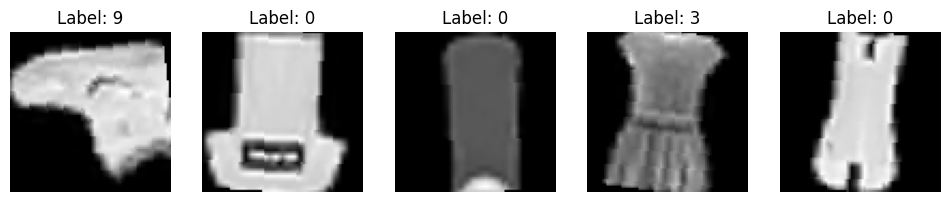

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    image, label = train_dataset[i]
    image = image.permute(1, 2, 0)
    axes[i].imshow(image.numpy(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()

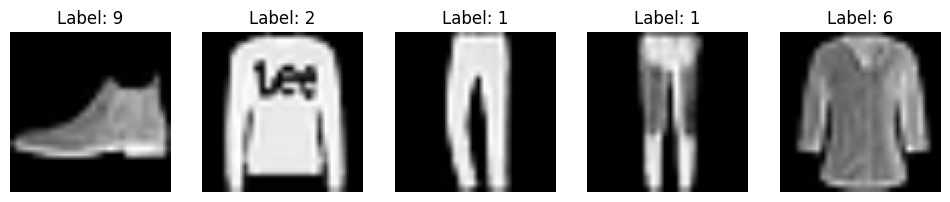

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    image, label = test_dataset[i]
    image = image.permute(1, 2, 0)
    axes[i].imshow(image.numpy(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()

In [8]:
from torch.utils.data import DataLoader

### Crear una función de collate que separe muestra y etiquetas y transforma las etiquetas categóricas en una representación one-hot encoded

In [9]:
def custom_collate_fn(data):
  images_collate = [item[0] for item in data]
  labels_collate = [item[1] for item in data]

  images_collate = torch.stack(images_collate)
  labels_one_hot = F.one_hot(torch.tensor(labels_collate), num_classes=10).float()


  return images_collate, labels_one_hot

### Crear un dataloader con la collate_fn y además que utilice num_workers y prefetch_factor

In [10]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn = custom_collate_fn, num_workers=4, prefetch_factor=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn = custom_collate_fn, num_workers=4, prefetch_factor=2)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Crear un loop del dataloader y mostrar 2 muestras por cada época.

In [11]:
for i, batch in enumerate(train_loader):
  X,y = batch
  print(f"Etapa {i+1}")
  print(f"Etiqueta \n {y}")
  print(f"Muestra \n {X.shape}")
  if i == 2:
    break

Etapa 1
Etiqueta 
 tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])
Muestra 
 torch.Size([16, 1, 75, 75])
Etapa 2
Etiqueta 
 tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.

## 2. Crear un Dataloader para un dataset tabular propio

In [12]:
np.random.seed(42)


features_class_0 = np.random.rand(10, 10)
features_class_1 = np.random.rand(10, 10) + 1


labels_class_0 = np.zeros(10, dtype=int)
labels_class_1 = np.ones(10, dtype=int)


features = np.vstack((features_class_0, features_class_1))
labels = np.concatenate((labels_class_0, labels_class_1))


data_tr = pd.DataFrame(features, columns=[f'feature_{i+1}' for i in range(features.shape[1])])
data_tr['label'] = labels

In [13]:
np.random.seed(36)


features_class_0 = np.random.rand(5, 10)
features_class_1 = np.random.rand(5, 10) + 1


labels_class_0 = np.zeros(5, dtype=int)
labels_class_1 = np.ones(5, dtype=int)


features = np.vstack((features_class_0, features_class_1))
labels = np.concatenate((labels_class_0, labels_class_1))


data_te = pd.DataFrame(features, columns=[f'feature_{i+1}' for i in range(features.shape[1])])
data_te['label'] = labels

In [14]:
data_tr

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0
5,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,0
6,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,0
7,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,0
8,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,0
9,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,0


In [15]:
data_te

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.728507,0.601614,0.952181,0.143173,0.807359,0.363215,0.186557,0.259151,0.629762,0.032561,0
1,0.947232,0.904318,0.550130,0.197008,0.232033,0.002366,0.226056,0.375343,0.452744,0.246079,0
2,0.460127,0.210407,0.670889,0.451769,0.592685,0.327012,0.223990,0.215618,0.171685,0.022679,0
3,0.629069,0.531413,0.243392,0.524828,0.174228,0.341936,0.998178,0.232437,0.025417,0.150733,0
4,0.483185,0.353762,0.639769,0.419413,0.187010,0.351765,0.482242,0.802009,0.402824,0.437993,0
5,1.873042,1.196441,1.721717,1.680160,1.205423,1.083013,1.207304,1.868844,1.716951,1.667637,1
6,1.400279,1.077304,1.230904,1.201255,1.162120,1.947135,1.250645,1.902852,1.771073,1.146951,1
7,1.884430,1.075059,1.663762,1.632169,1.318217,1.450715,1.786880,1.869081,1.712292,1.499993,1
8,1.967180,1.334586,1.269983,1.561898,1.993271,1.890240,1.124810,1.385494,1.423963,1.177752,1
9,1.011134,1.771680,1.951172,1.254431,1.960615,1.773805,1.834671,1.490503,1.937667,1.367405,1


In [16]:
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler

class TabularDataset(Dataset):
    def __init__(self, df):
        # Cargar datos desde el archivo CSV
        self.data = df

        # Separar features y labels
        self.features = self.data.iloc[:, :-1].values  # Todas las columnas excepto la última
        self.labels = self.data.iloc[:, -1].values  # Última columna como etiquetas

        # Normalizar las features entre 0 y 1
        self.scaler = MinMaxScaler()
        self.features_norm = self.scaler.fit_transform(self.features)
    def __len__(self):
        # Devuelve el número de muestras
        return len(self.features)

    def __getitem__(self, idx):
        # Devuelve una muestra y su etiqueta dado un índice

        final_x = torch.tensor(self.features_norm[idx], dtype=torch.float32)
        final_y = torch.tensor(self.labels[idx], dtype=torch.long)
        return final_x, final_y

### Creamos una instancia de la clase dataset

In [17]:
tabular_dataset_tr = TabularDataset(data_tr)

In [18]:
tabular_dataset_te = TabularDataset(data_te)

### Visualizar 3 muestras de cada conjunto

In [19]:
print(f"Número de muestras: {len(tabular_dataset_tr)}")

for i in range(3):
  features, label = tabular_dataset_tr[i]
  print(f"Features normalizadas: {features}")
  print(f"Label: {label}")

Número de muestras: 20
Features normalizadas: tensor([0.1823, 0.4615, 0.3775, 0.2950, 0.0000, 0.0000, 0.0000, 0.4345, 0.3012,
        0.3436])
Label: 0
Features normalizadas: tensor([0.0000, 0.4724, 0.4298, 0.0820, 0.0141, 0.0160, 0.1399, 0.2472, 0.2127,
        0.1271])
Label: 0
Features normalizadas: tensor([0.3045, 0.0000, 0.1490, 0.1669, 0.1640, 0.3668, 0.0805, 0.2415, 0.2967,
        0.0000])
Label: 0


In [20]:
print(f"Número de muestras: {len(tabular_dataset_te)}")

for i in range(3):
  features, label = tabular_dataset_te[i]
  print(f"Features normalizadas: {features}")
  print(f"Label: {label}")

Número de muestras: 10
Features normalizadas: tensor([0.1781, 0.2506, 0.4150, 0.0000, 0.3481, 0.1855, 0.0000, 0.0258, 0.3160,
        0.0060])
Label: 0
Features normalizadas: tensor([0.3232, 0.4445, 0.1796, 0.0350, 0.0318, 0.0000, 0.0240, 0.0947, 0.2235,
        0.1358])
Label: 0
Features normalizadas: tensor([0.0000, 0.0000, 0.2503, 0.2008, 0.2300, 0.1669, 0.0227, 0.0000, 0.0765,
        0.0000])
Label: 0


### Crear una función collate que separe las muestras y las etiquetas, utilizando torch.stack

In [21]:
def custom_collate_fn(data):
  images_collate = [item[0] for item in data]
  labels_collate = [item[1] for item in data]

  images_collate = torch.stack(images_collate)
  labels_collate = torch.stack(labels_collate)


  return images_collate, labels_collate

### Crear un dataloader con:
* Batch_size = 5
* Que mezcle las muestras de entrenamiento
* Aplicando num_workers y prefetch_factor de 2 en los dos casos.
* Utilizando pin_memory = True


In [22]:
train_loader_collate = DataLoader(tabular_dataset_tr, batch_size=10, shuffle=True, collate_fn = custom_collate_fn, num_workers=2, prefetch_factor=2, pin_memory = True)
train_loader_collate = DataLoader(tabular_dataset_tr, batch_size=10, shuffle=True, collate_fn = custom_collate_fn, num_workers=2, prefetch_factor=2, pin_memory = True)

In [23]:
def measure_dataloader_time(dataloader):
    start_time = time.time()
    for batch in dataloader:
        x, y = batch
    end_time = time.time()
    return end_time - start_time

In [24]:
total_time = measure_dataloader_time(train_loader_collate)
print(f"Tiempo total: {total_time:.2f} segundos\n")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Tiempo total: 0.07 segundos

